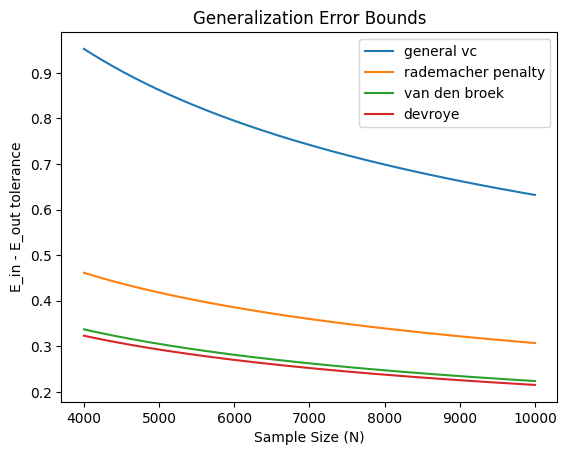

In [1]:
import matplotlib.pyplot as plt
import math
def vcbound(N):
    return ((8/N)*math.log((4*(2**50)*(N**50))/0.05))**0.5

def rdbound(N):
    return ((2*math.log(2*(N**51)))/(N))**0.5 + ((2/N)*(math.log((1)/(0.05))))*0.5 + 1/N

def vdbound(N):
    return (2 + (4 + 4*N*math.log(120*(2**50)*(N**50)))**0.5)/(2*N)

def dvbound(N):
    return (2 + (4 + 2*(N-2)*math.log(80*(N**100)))**0.5)/(2*(N-2))
x = []
y1 = []
y2 = []
y3 = []
y4 = []
for i in range(4000,10000):
    x.append(i)
    y1.append(vcbound(i))
    y2.append(rdbound(i))
    y3.append(vdbound(i))
    y4.append(dvbound(i))

plt.plot(x,y1, label = 'general vc')
plt.plot(x,y2, label = 'rademacher penalty')
plt.plot(x,y3, label = 'van den broek')
plt.plot(x,y4, label = 'devroye')




plt.xlabel('Sample Size (N)')
plt.ylabel('E_in - E_out tolerance')
plt.title('Generalization Error Bounds')

# Show legend
plt.legend()

In [40]:
print(vcbound(5))
print(rdbound(5))
print(vdbound(5))
print(dvbound(5))

13.828161484991483
6.553257357872088
5.101361981989992
5.593125543182669


In [24]:
print(dvbound(10000))

(0.0001000200040008265+0.43025600148030474j)


In [168]:
import random
def sample():
    p1 = random.uniform(-1,1)
    p2 = random.uniform(-1,1)
    return [p1,p2]

def mse(actual_vals, hypo_vals):
    n = len(actual_vals)
    error_sum = 0
    for i in range(n):
        error_sum += (actual_vals[i] - hypo_vals[i])**2
    return error_sum/n

a_vals = []
var_vals = []

def minimize(actual_points):
    x1 = actual_points[0]
    x2 = actual_points[1]
    y1 = math.sin(math.pi*x1)
    y2 = math.sin(math.pi*x2)
    slopes = []
    slope_errors = []
    for s in range(1, 100):
        slope = s/10
        hypo_vals = [(slope)*actual_points[0], (slope)*actual_points[1]]
        slopes.append(slope)
        slope_errors.append(mse([y1,y2], hypo_vals))
    
    
    return slopes[slope_errors.index(min(slope_errors))]

for i in range(10000):
    a_vals.append(minimize(sample()))

print(sum(a_vals)/len(a_vals))
    

1.4263900000000052


In [174]:
sum_diffs = 0
for i in range(1000):
    sum_diffs += abs(a_vals[i] - 1.42)
print(sum_diffs/1000)

0.71512


In [178]:
a_vals = []

def minimize2(actual_points):
    x1 = actual_points[0]
    x2 = actual_points[1]
    y1 = math.sin(math.pi*x1)
    y2 = math.sin(math.pi*x2)
    slopes = []
    slope_errors = []
    for s in range(1, 100):
        slope = s/10
        hypo_vals = [(slope)*(actual_points[0]**2), (slope)*(actual_points[1]**2)]
        slopes.append(slope)
        slope_errors.append(mse([y1,y2], hypo_vals))
    
    
    return slopes[slope_errors.index(min(slope_errors))]

for i in range(10000):
    a_vals.append(minimize2(sample()))

print(sum(a_vals)/len(a_vals))
    

1.3348800000001253


In [180]:
a_vals = []
def minimize3(actual_points):
    x1 = actual_points[0]
    x2 = actual_points[1]
    y1 = math.sin(math.pi*x1)
    y2 = math.sin(math.pi*x2)
    hypothesis = []
    slope_errors = []
    for s in range(1, 100):
        slope = s/10
        for k in range(-10, 10):
            b = k/10
            hypo_vals = [(slope)*(actual_points[0]**2) + b, (slope)*(actual_points[1]**2) + b]
            hypothesis.append([slope, b])
            slope_errors.append(mse([y1,y2], hypo_vals))
    return hypothesis[slope_errors.index(min(slope_errors))]
sumslope = 0
sumintercept = 0
for i in range(10000):
    slope, intercept = minimize3(sample())
    sumslope += slope
    sumintercept += intercept
print(sumslope/10000)
print(sumintercept/10000)

1.4915400000001064
-0.2637800000000012
